<a href="https://colab.research.google.com/github/WPNJoherrera/DATA-ANALYTICS/blob/Proyectos/Proy03_2er_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Armado de Ambiente

## 1a. Llamado Phyton Librerias


In [ ]:
!pip install statistics

from scipy import stats as nstats
import random
import pandas as pd
import seaborn as sns
import statistics as stats # estadística
import matplotlib.pyplot as plt
import numpy as np
import scipy

random.seed(123)

  Preparing metadata (setup.py) ... done
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7436 sha256=e8414b0faec1e8b9eeb47427447081fdbd6b70e62208ca603bccb48fdf5cb530
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built statistics


## 2a. Montaje del Google Drive

In [ ]:
#cargamos la data desde Google Drive
from google.colab import drive
drive.mount('/content/JoHS-Drive/')

Mounted at /content/JoHS-Drive/


#Carga Data Set en un DataFrame



In [ ]:
dfOri = pd.read_excel('/content/JoHS-Drive/MyDrive/Data & Analitics (Phyton Machine Learning)/Data/Data_Nutricion_grupos.xlsx')

dfOri.head()



,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,Persona 1,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A
1,Persona 2,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A
2,Persona 3,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A
3,Persona 4,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A
4,Persona 5,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,30.276688,40.439521,10.0,19.0,20.0,19.0,A


##Gestion del Data Frame

In [ ]:
#Preparacion del DSet Para el analisis.

df = dfOri.copy(deep=True)

##df.info()

print("La cantidad de columnas en los datos es: ",df.shape[1])
print("La cantidad de filas en los datos es: ",   df.shape[0])
print("Cantidad de registros duplicados es: ",  df.duplicated().sum() )



La cantidad de columnas en los datos es:  17
La cantidad de filas en los datos es:  652
Cantidad de registros duplicados es:  0


In [ ]:
# Revisamos los datos perdidos

df.isna().sum()

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

##Libreria de funciones


In [ ]:
#
#> Clasifica el IMC
#

def clasificaIMC( numIMC ):

  '''
    Funcion clasificaIMC( numIMC )
    Recive el IMC y devuelve su clasificación
  '''

  vReturn = 'IMC Invalido'

#26.38

  if numIMC < 18.5:
    vReturn = 'peso insuficiente'

  if numIMC >= 18.5 and numIMC < 24.9:
    vReturn = 'peso normal'

  if numIMC >= 25.0 and numIMC < 29.9:
    vReturn = 'sobrepeso'

  if numIMC >= 30:
    vReturn = 'obesidad'

  return vReturn


#
#> Clasifica la Edad
#

def clasificaEdad( numEdad ):

  '''
    Funcion clasificaEdad( numEdad )
    Recive la edad y devuelve la etapa de vida correspondiente
  '''

  vReturn = ''

  if numEdad < 6:
    vReturn = 'Infancia'

  if numEdad >= 6 and numEdad < 12:
    vReturn = 'Niñez'

  if numEdad >= 12 and numEdad < 20:
    vReturn = 'Adolescencia'

  if numEdad >= 20 and numEdad < 25:
    vReturn = 'Juventud'

  if numEdad >= 25 and numEdad < 60:
    vReturn = 'Adultez'

  if numEdad >= 60:
    vReturn = 'Ancianidad'

  return vReturn





##Reclasificacion de variables

In [ ]:
df["IMC-Name"] = df.apply( lambda x: clasificaIMC( numIMC=x["IMC"] ) , axis=1)

df["Etapa-Vida"] = df.apply( lambda x: clasificaEdad( numEdad=x["edad"] ) , axis=1)

df

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos,IMC-Name,Etapa-Vida
0,Persona 1,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A,sobrepeso,Adolescencia
1,Persona 2,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A,peso normal,Adolescencia
2,Persona 3,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A,peso normal,Adolescencia
3,Persona 4,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A,peso normal,Adolescencia
4,Persona 5,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,30.276688,40.439521,10.0,19.0,20.0,19.0,A,peso normal,Adolescencia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Persona 648,165.5,14.0,88.0,32.5,21.029381,72.5,85.0,0.852941,0.438066,19.209928,71.095263,12.0,13.0,12.0,13.0,B,peso normal,Adolescencia
648,Persona 649,144.2,14.0,48.6,31.5,23.132073,73.0,87.5,0.834286,0.506241,28.565420,34.717206,8.0,18.0,18.0,16.0,B,peso normal,Adolescencia
649,Persona 650,154.0,15.0,58.9,31.5,22.769438,85.0,96.0,0.885417,0.551948,26.623783,43.218592,8.0,12.0,14.0,18.0,B,peso normal,Adolescencia
650,Persona 651,174.3,14.0,88.7,37.0,27.023922,85.8,101.0,0.849505,0.492255,22.424506,68.809463,11.0,16.0,18.0,20.0,B,sobrepeso,Adolescencia


##Extraccion de las columnas Numericas y String

In [ ]:

var_numCol = df.select_dtypes(include=['float64', 'int']).columns

var_strCol = df.select_dtypes(include=['object']).columns

df[var_numCol].head()


,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0
1,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0
2,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0
3,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0
4,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,30.276688,40.439521,10.0,19.0,20.0,19.0


In [ ]:
df[var_strCol].head()

,Individuo,Grupos,IMC-Name,Etapa-Vida
0,Persona 1,A,sobrepeso,Adolescencia
1,Persona 2,A,peso normal,Adolescencia
2,Persona 3,A,peso normal,Adolescencia
3,Persona 4,A,peso normal,Adolescencia
4,Persona 5,A,peso normal,Adolescencia


##Imputacion de los valores perdidos nan.
Se debe de imputar, paraevitar datos perdidos en los calculos de curtosis y correlaciones.

In [ ]:
def imputacionData(x):
  m = scipy.nanmean(x) #stats.mean(x)
  return m

In [ ]:

#dMean = df.mean()

dMean = df[var_numCol].apply(imputacionData, axis=0).round(2)

df.fillna(dMean, inplace=True)


<ipython-input-11-fa360083a8d5>:2: DeprecationWarning: scipy.nanmean is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmean instead
  m = scipy.nanmean(x) #stats.mean(x)


In [ ]:

df.isna().sum()


Individuo                      0
talla                          0
edad                           0
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
masa_corporal_magra_kg         0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
Grupos                         0
IMC-Name                       0
Etapa-Vida                     0
dtype: int64

#Análisis descriptivo

In [ ]:
percentiles = [.1, .25, .5, .75, .9]
Descrip = df.describe(percentiles=percentiles).T.round(2)
Descrip

,count,mean,std,min,10%,25%,50%,75%,90%,max
talla,652.0,158.82,7.32,135.60,149.70,153.80,158.82,163.30,169.16,188.60
edad,652.0,14.75,1.05,0.00,14.00,14.00,15.00,15.00,16.00,17.00
peso_kg,652.0,56.94,8.44,33.90,47.60,51.20,56.10,61.45,68.06,91.10
circun_cuello,652.0,32.14,2.11,24.50,29.50,30.70,32.10,33.50,34.80,39.20
IMC,652.0,22.43,3.02,14.54,18.99,20.31,22.19,23.86,26.43,36.71
circun_cintura,652.0,74.52,6.84,55.00,66.82,70.00,73.90,78.00,83.50,107.50
cadera,652.0,89.87,7.18,69.80,81.50,85.00,89.00,94.00,99.00,120.80
ind_cintura_cadera,652.0,0.83,0.05,0.65,0.76,0.80,0.83,0.87,0.90,1.03
ind_cintura_estatura,652.0,0.47,0.05,0.36,0.42,0.44,0.47,0.49,0.53,0.70
por_grasa_corporal,652.0,23.54,7.85,4.21,12.26,16.13,26.09,30.07,32.34,39.45


###Visualizacion de las variables cuantitativas.

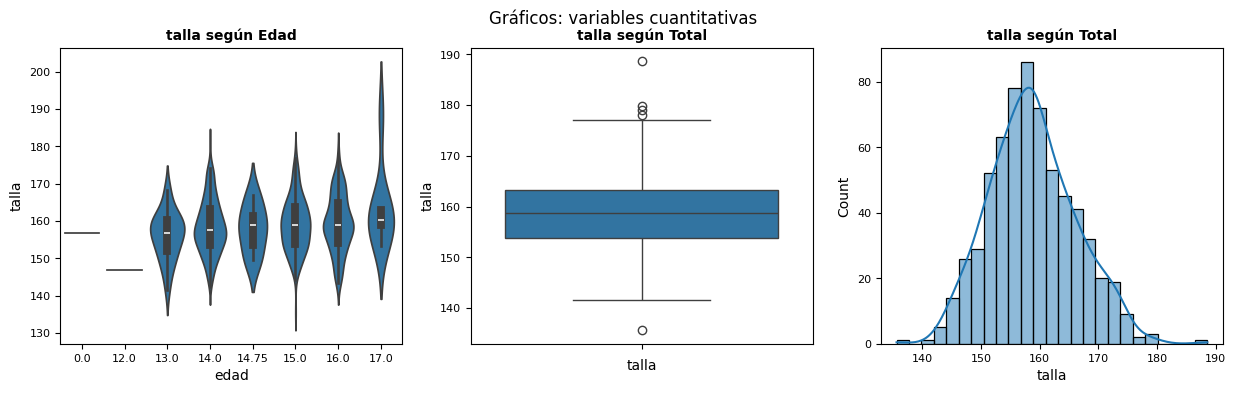

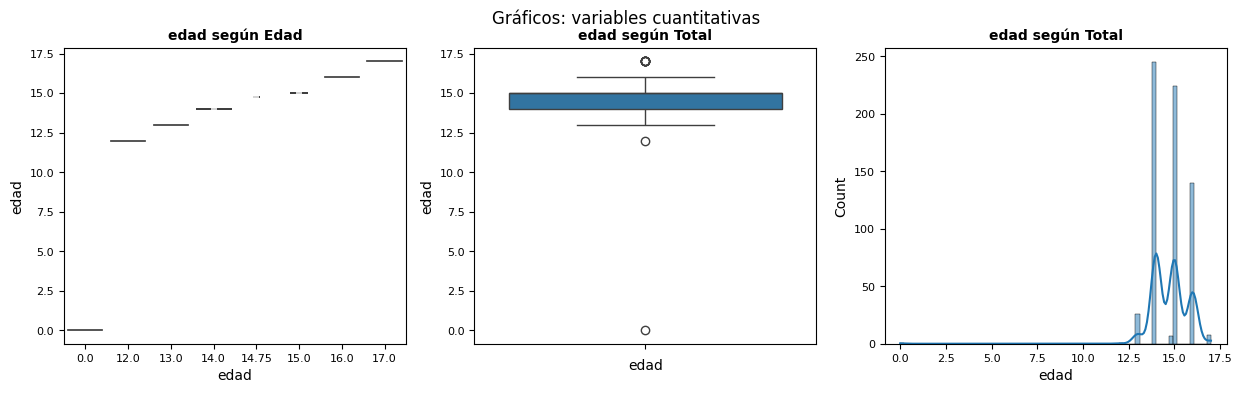

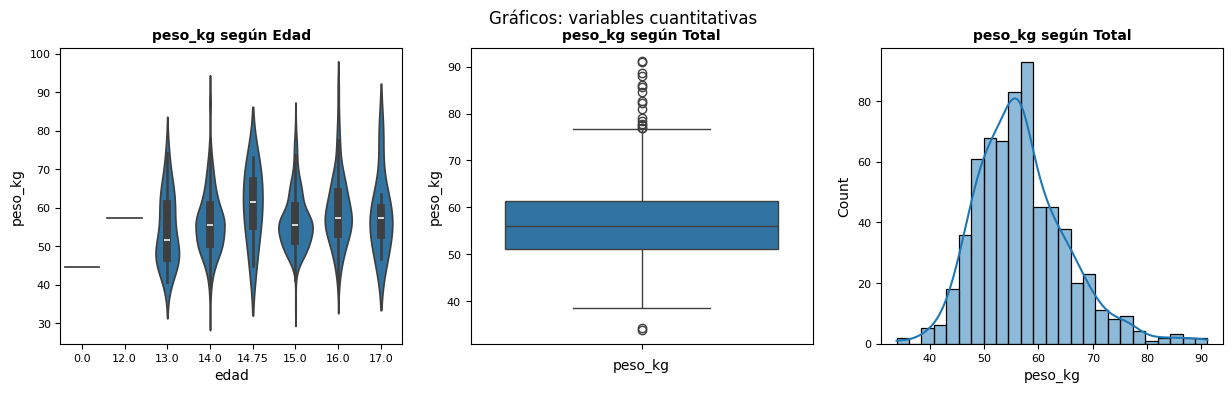

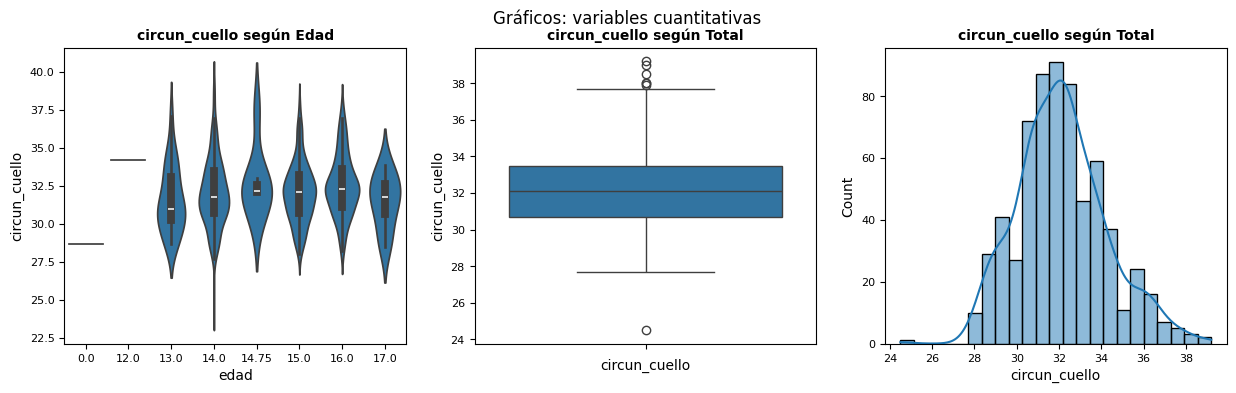

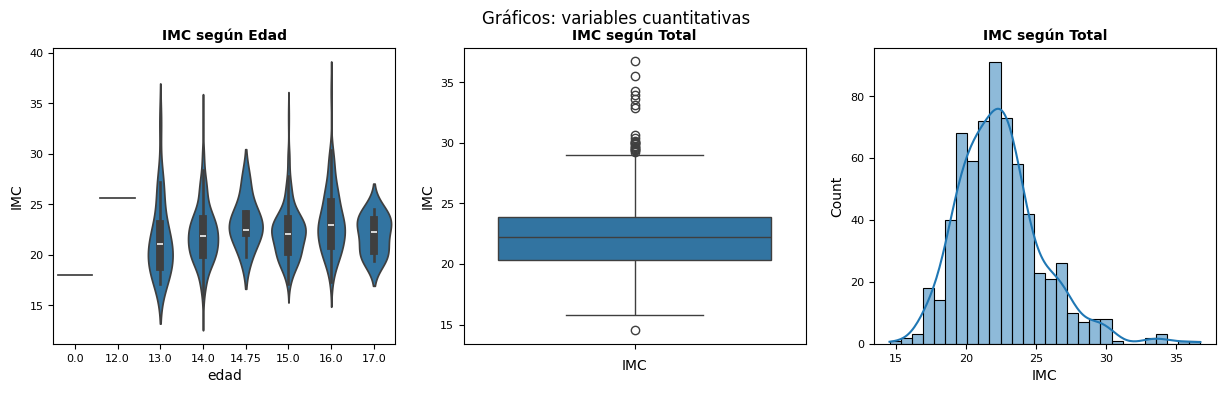

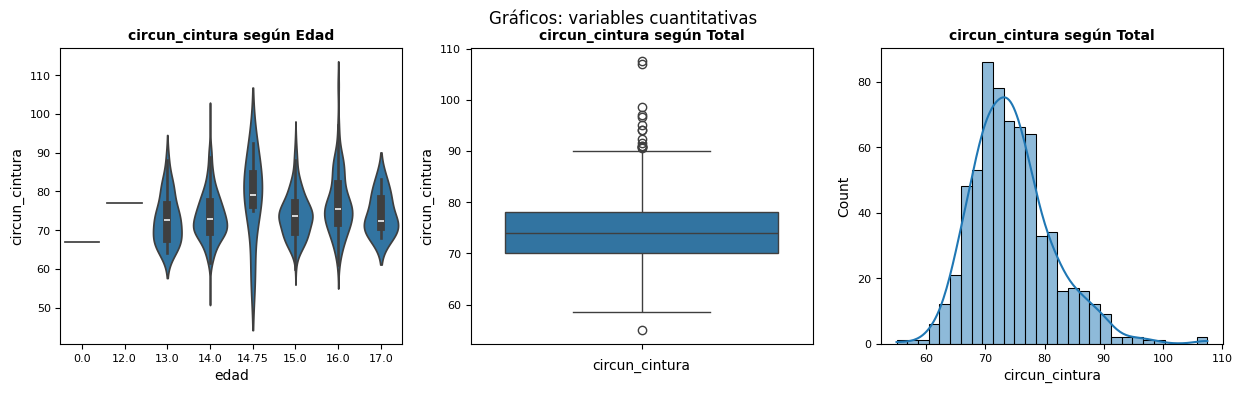

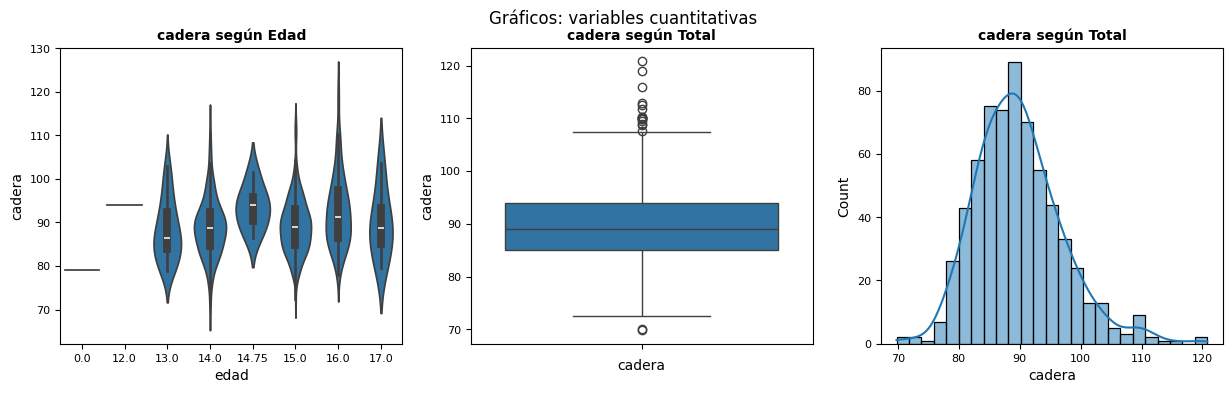

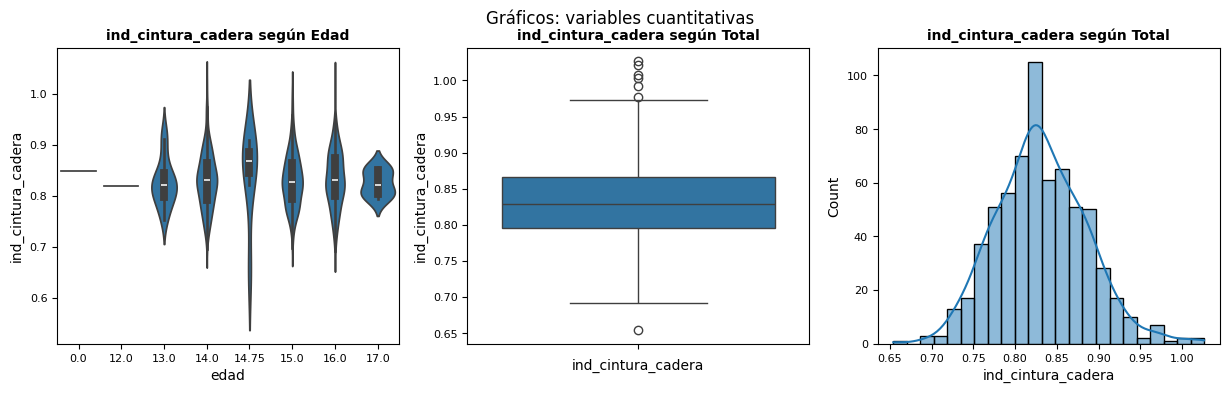

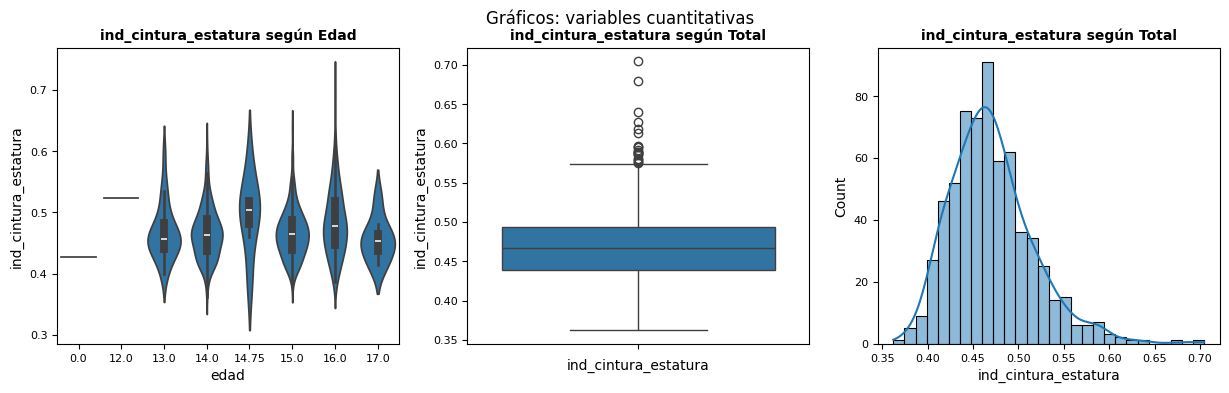

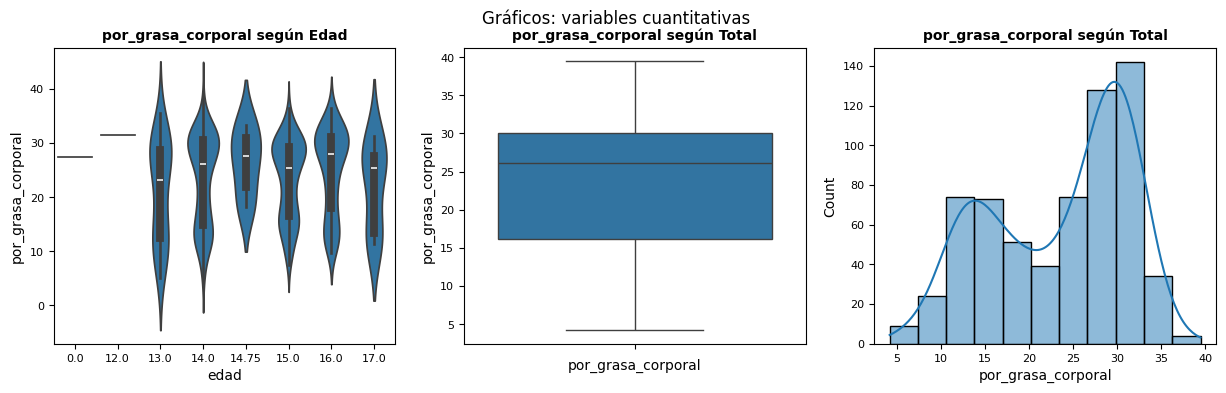

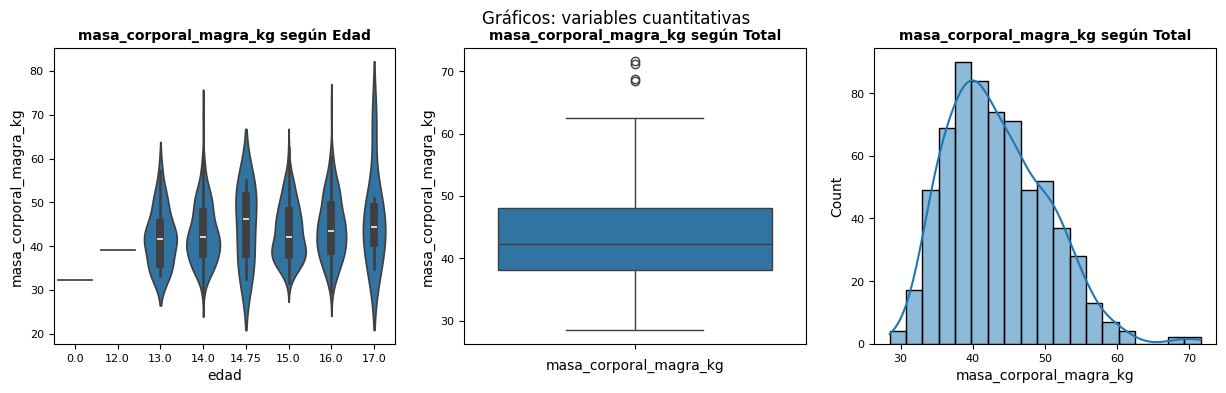

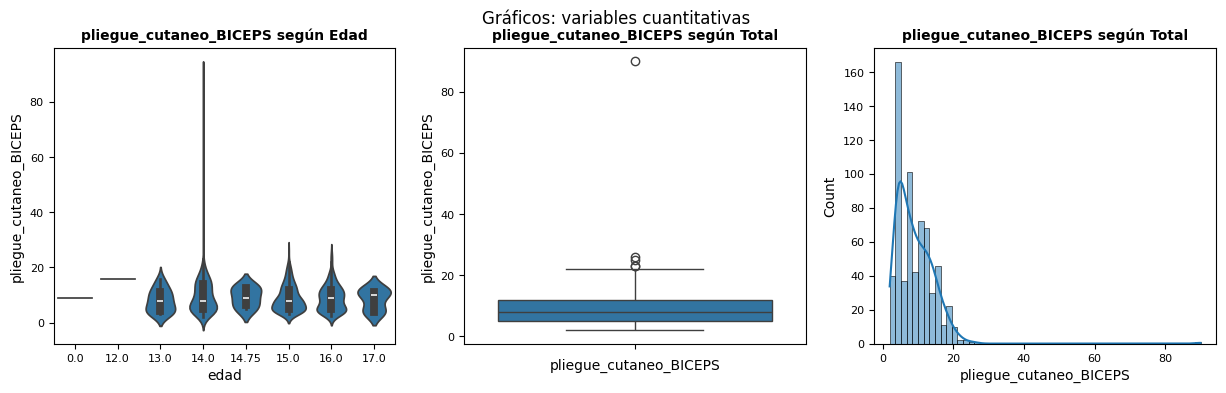

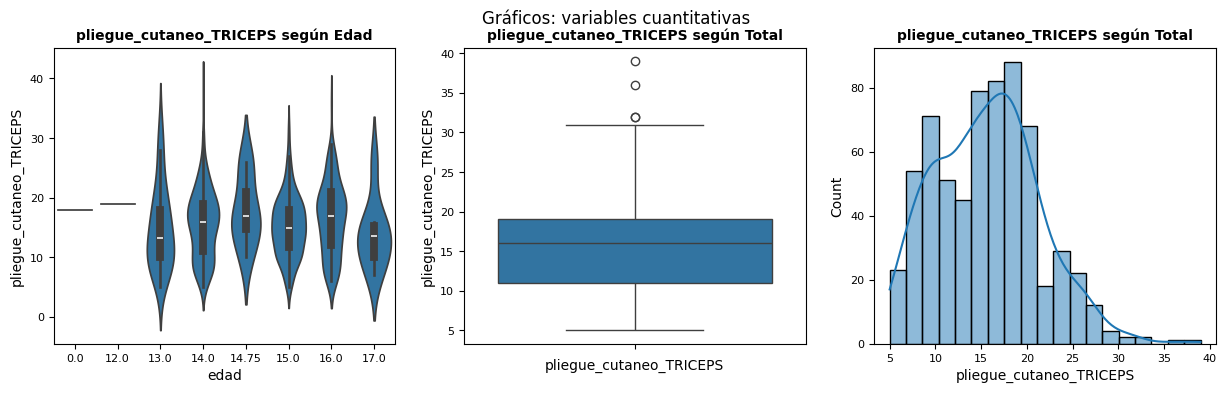

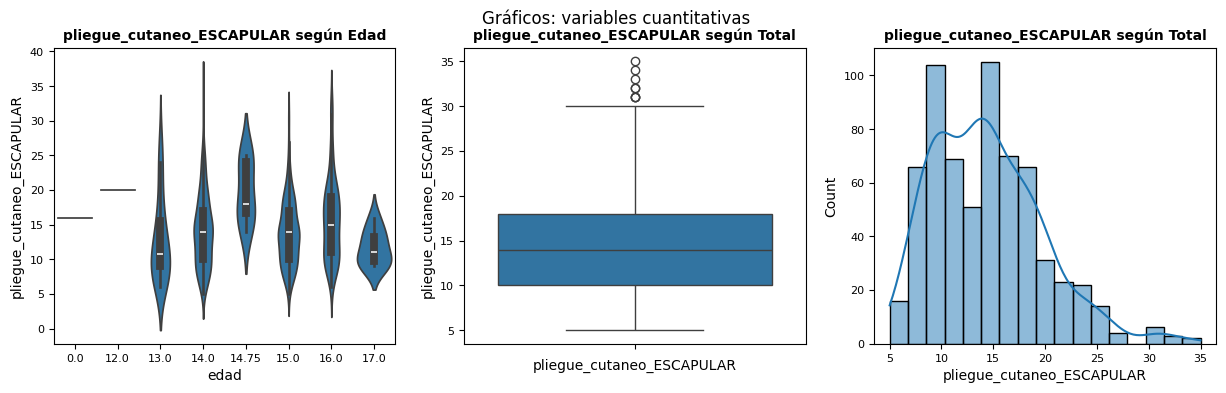

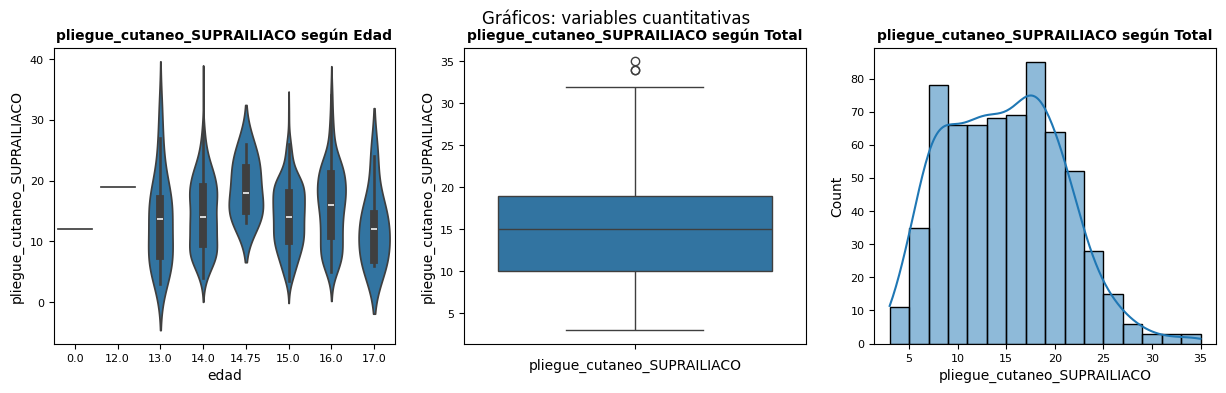

In [ ]:

 #Graficando las variables cuantitativas

for i, colum in enumerate(var_numCol):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: variables cuantitativas')

    sns.violinplot(x = 'edad', y = colum,  data  = df, ax=ax[0])
    ax[0].set_title(str(colum) + " según Edad", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel('edad')

    sns.boxplot(y = colum,  data  = df, ax=ax[1])
    ax[1].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)

    sns.histplot(x=colum, data=df, kde= True, ax=ax[2])
    ax[2].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[2].tick_params(labelsize = 8)
    ax[2].set_xlabel(colum)


###Visualizacion de las variables cualitativas.

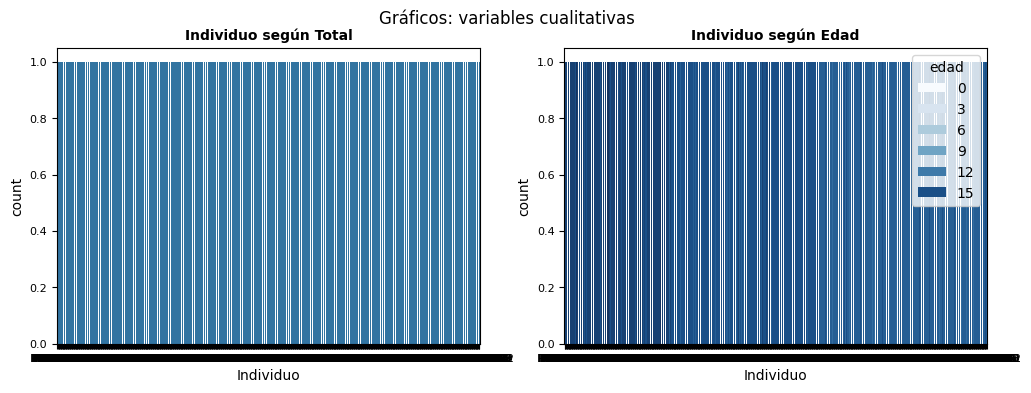

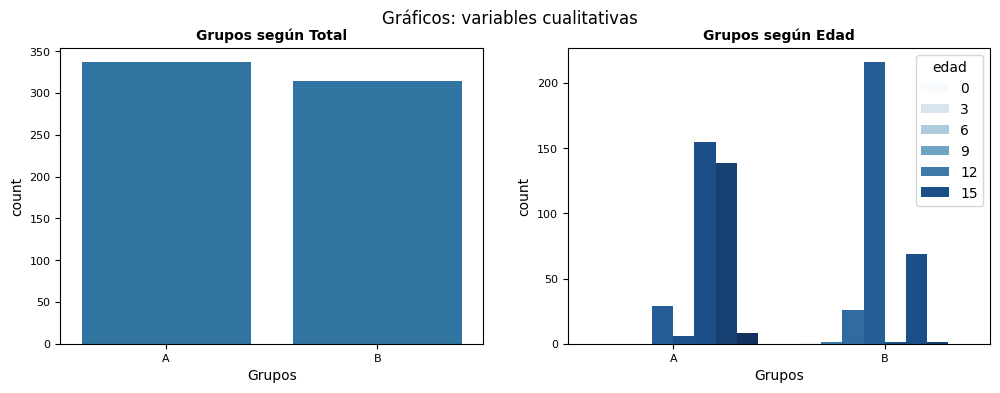

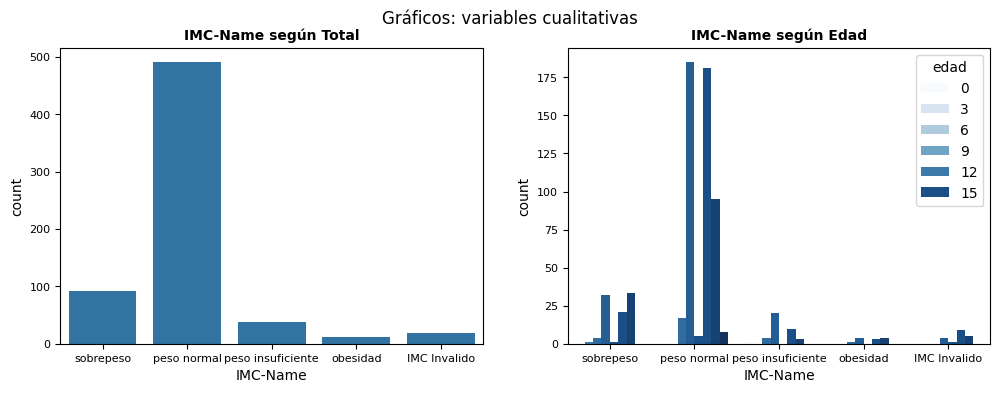

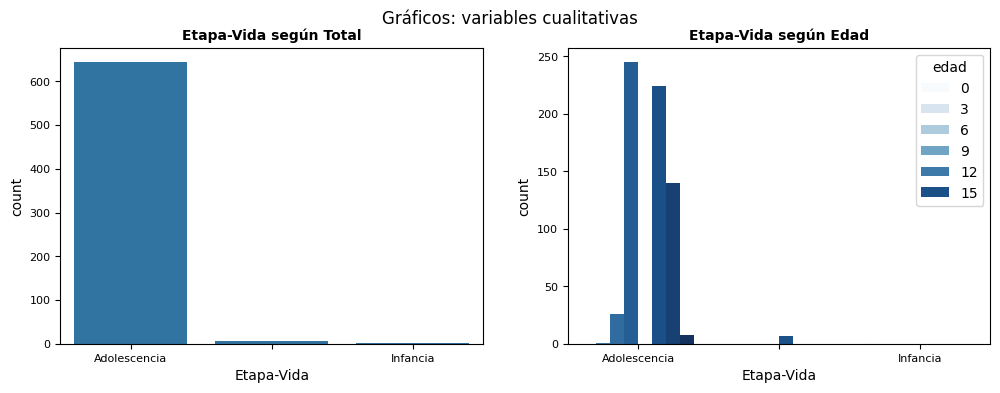

In [ ]:

# Graficando las variables cualitativas

for i, colum in enumerate(var_strCol):
    fig, ax = plt.subplots(1, 2, figsize=(12, 3.84))
    fig.suptitle('Gráficos: variables cualitativas')

    sns.countplot(x=colum, data=df, ax=ax[0])
    ax[0].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)

    sns.countplot(x=colum, hue="edad", data=df, palette="Blues", ax=ax[1])
    ax[1].set_title(str(colum) + " según Edad", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)


#**Estadística Inferencial**


##Prueba de normalidad

Prueba de normalidad. Los resultados de la prueba indican si usted debe rechazar o no puede rechazar la hipótesis nula de que los datos provienen de una población distribuida normalmente.

PLANTEAMIENTO DE LAS HIPóTESIS

Ho: Los datos estan normalmente distribuidos

Ha: Los datos no estan normalmente distribuidos

Nivel de significancia = 5% (0.05)

Si p-valor <= 0.05 (5%/2) ->Rechazamos Ho y Aceptamos Ha.

Si p-valor  > 0.05 (5%/2) ->Rechazamos Ha y Aceptamos Ho.

In [ ]:
#import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

###Prueba Normalidad por Variable "edad"

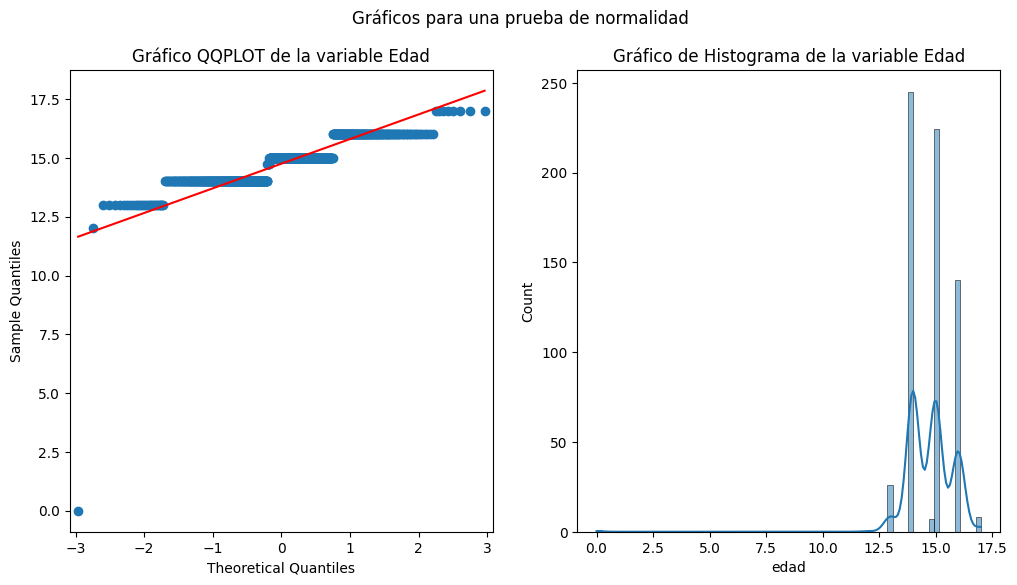

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable Edad')
axes[1].set_title('Gráfico de Histograma de la variable Edad')

qqplot(df['edad'] , line='s', ax=axes[0])
sns.histplot(x='edad', data=df, ax=axes[1], kde= True)
plt.show()

In [ ]:
# Prueba de Shapiro-Wilk (n <= 50)
stat, p = shapiro(df['edad'])

print('Estadisticos=%.3f, p-value=%.3f' % (stat, p))

Estadisticos=0.716, p-value=0.000


In [ ]:
#Cuando n > 50

stat2, p2 = kstest(df['edad'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.998, p-value=0.000


Conclusión:
Con un nivel de significancia del 5%, se afirma que, los datos de la variables "Edad" no están normalmente distribuidos.

###Prueba Normalidad por Variable "IMC"

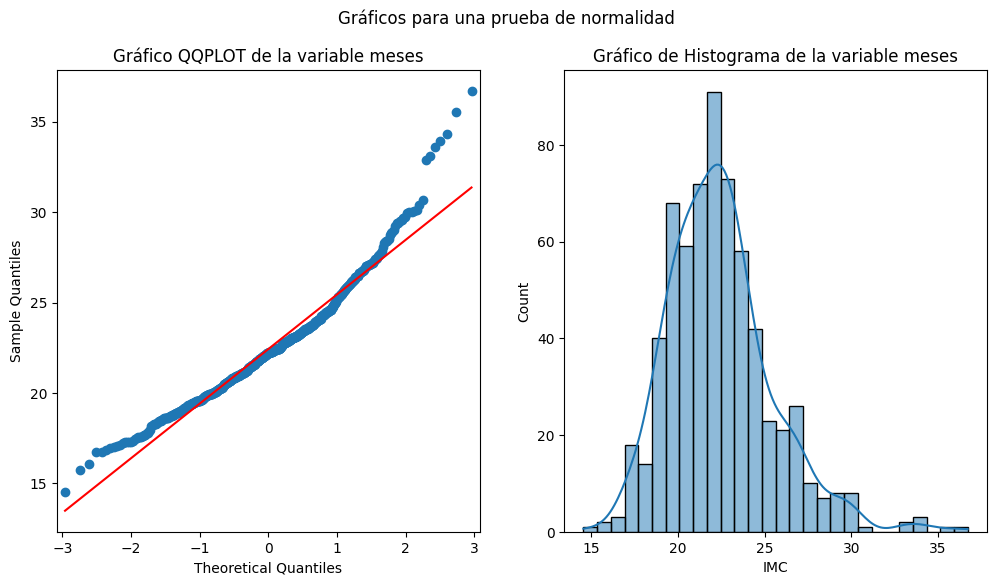

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable meses')
axes[1].set_title('Gráfico de Histograma de la variable meses')

qqplot(df['IMC'] , line='s', ax=axes[0])
sns.histplot(x='IMC', data=df, ax=axes[1], kde= True)
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(df['IMC'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


Conclusión: Con un nivel de significancia del 5%, se afirma que, los datos de la variables "IMC", no están normalmente distribuidos.

###Prueba Normalidad por Variable "peso_kg"

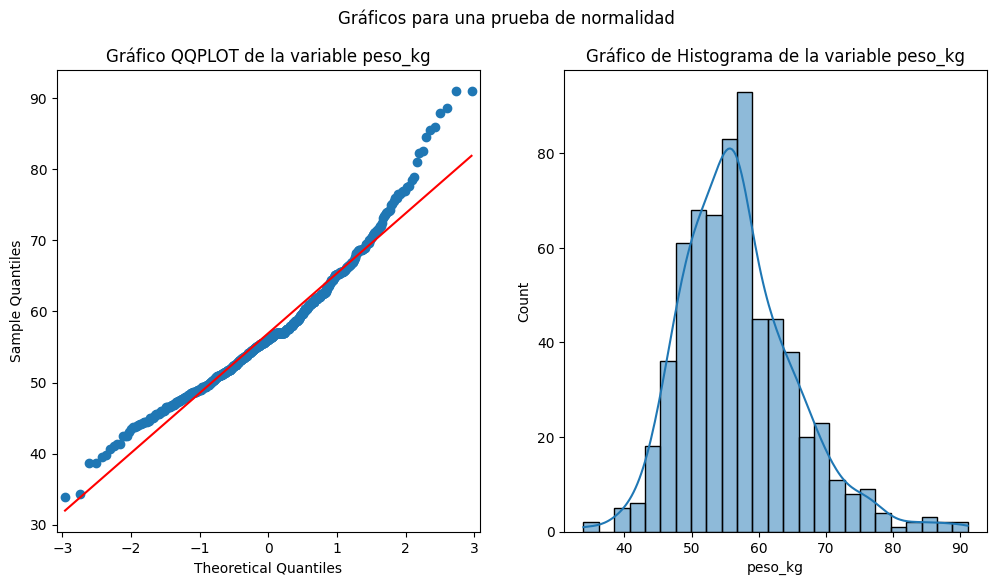

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable peso_kg')
axes[1].set_title('Gráfico de Histograma de la variable peso_kg')

qqplot(df['peso_kg'] , line='s', ax=axes[0])
sns.histplot(x='peso_kg', data=df, ax=axes[1], kde= True)
plt.show()


In [ ]:
#Cuando n > 50

stat2, p2 = kstest(df['peso_kg'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


Conclusión: Con un nivel de significancia del 5%, se afirma que, los datos de la variables "peso_kg", no están normalmente distribuidos.

###Prueba Normalidad por Variable "talla"

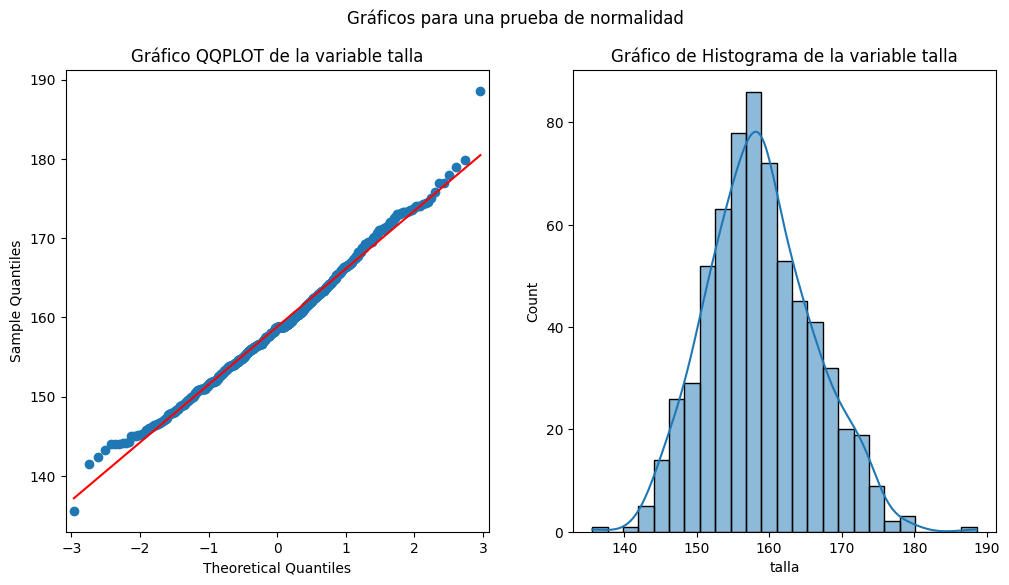

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable talla')
axes[1].set_title('Gráfico de Histograma de la variable talla')

qqplot(df['talla'] , line='s', ax=axes[0])
sns.histplot(x='talla', data=df, ax=axes[1], kde= True)
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(df['talla'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


Conclusión: Con un nivel de significancia del 5%, se afirma que, los datos de la variables "talla", no están normalmente distribuidos.

###Prueba Normalidad por Variable "circun_cintura"

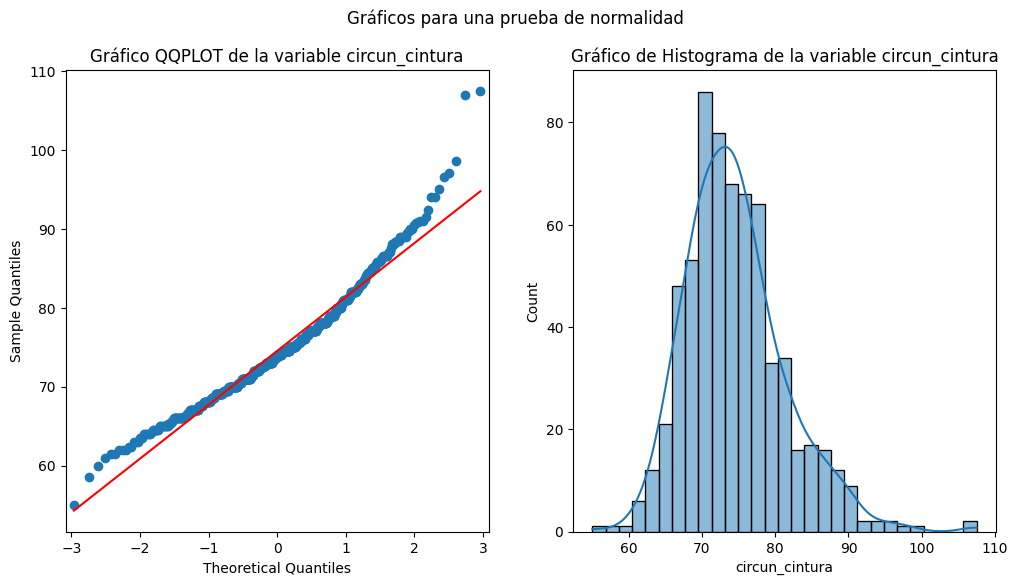

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable circun_cintura')
axes[1].set_title('Gráfico de Histograma de la variable circun_cintura')

qqplot(df['circun_cintura'] , line='s', ax=axes[0])
sns.histplot(x='circun_cintura', data=df, ax=axes[1], kde= True)
plt.show()


In [ ]:
#Cuando n > 50

stat2, p2 = kstest(df['circun_cintura'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


Conclusión: Con un nivel de significancia del 5%, se afirma que, los datos de la variables "circun_cintura", no están normalmente distribuidos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        652 non-null    float64
 2   edad                         652 non-null    float64
 3   peso_kg                      652 non-null    float64
 4   circun_cuello                652 non-null    float64
 5   IMC                          652 non-null    float64
 6   circun_cintura               652 non-null    float64
 7   cadera                       652 non-null    float64
 8   ind_cintura_cadera           652 non-null    float64
 9   ind_cintura_estatura         652 non-null    float64
 10  por_grasa_corporal           652 non-null    float64
 11  masa_corporal_magra_kg       652 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

##A. Normalizando variables / transformadas
normalización = ( x – min(x) ) / ( max(x) – min(x) )

Los valores normalizados para todos los demás valores del conjunto de datos estarán entre 0 y 1

In [ ]:
# Data numérica
# 'edad', 'meses', 'max_ant', 'ingreso', 'score'
data_riesgo_num = df.loc[:, var_numCol]
data_riesgo_num.head(10)

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,155.7,16.0,71.2,35.7,29.576170,90.00,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0
1,166.5,16.0,61.0,31.8,22.364707,80.90,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0
2,151.3,16.0,49.1,30.5,21.623567,72.00,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0
3,151.7,16.0,54.6,32.6,23.117479,74.52,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0
4,160.3,16.0,58.0,30.1,22.260196,74.52,97.9,0.813075,0.470000,30.276688,40.439521,10.0,19.0,20.0,19.0
5,162.4,16.0,70.8,33.9,26.124451,86.50,106.1,0.815269,0.532635,31.439726,48.540674,11.0,25.0,18.0,20.0
6,167.0,16.0,47.4,30.5,17.318656,66.70,81.5,0.830000,0.399401,9.690057,42.806913,3.5,7.0,6.0,6.0
7,158.7,16.0,49.3,31.2,18.979031,69.30,83.2,0.832933,0.436673,23.540000,41.235083,5.5,12.0,10.5,11.5
8,158.2,16.0,91.0,37.5,35.521296,107.50,116.0,0.926724,0.679520,34.760913,59.367569,25.0,21.0,25.0,23.0
9,171.0,16.0,50.4,30.8,17.543860,66.00,80.0,0.825000,0.385965,12.045941,44.328846,3.0,7.0,8.5,9.0


###sklearn.preprocessing

In [ ]:
# Normalizamos las variables numéricas

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_num_norm = scaler.fit_transform( data_riesgo_num )
df_num_norm

array([[0.37924528, 0.94117647, 0.6520979 , ..., 0.64705882, 0.9       ,
        0.96875   ],
       [0.58301887, 0.94117647, 0.47377622, ..., 0.41176471, 0.33333333,
        0.59375   ],
       [0.29622642, 0.94117647, 0.26573427, ..., 0.38235294, 0.43333333,
        0.4375    ],
       ...,
       [0.34716981, 0.88235294, 0.43706294, ..., 0.20588235, 0.3       ,
        0.46875   ],
       [0.73018868, 0.82352941, 0.95804196, ..., 0.32352941, 0.43333333,
        0.53125   ],
       [0.42264151, 0.82352941, 0.41433566, ..., 0.55882353, 0.5       ,
        0.65625   ]])

In [ ]:
data_riesgo_num2_norm = pd.DataFrame(
    data=df_num_norm,
    columns=var_numCol)
data_riesgo_num2_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

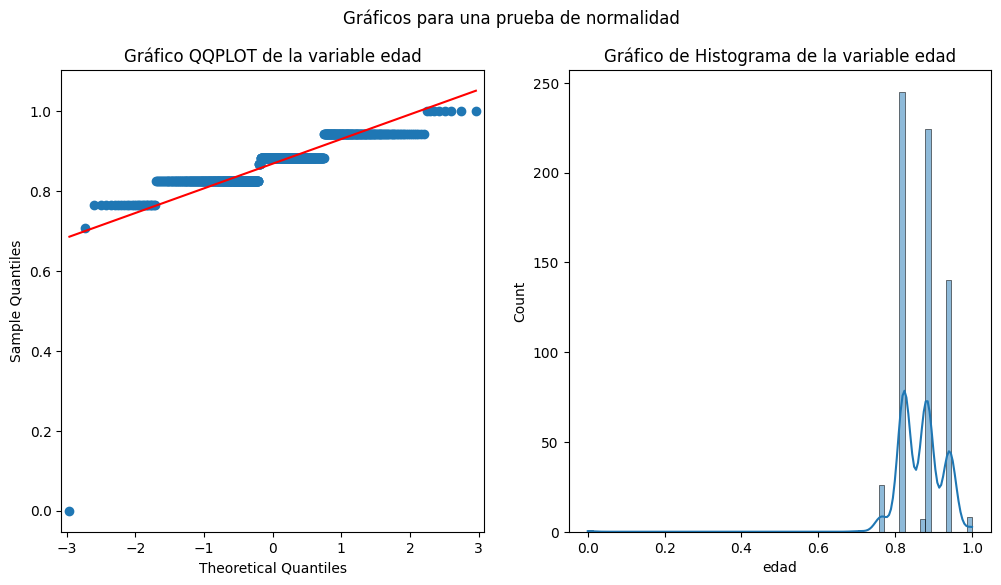

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable edad')
axes[1].set_title('Gráfico de Histograma de la variable edad')

qqplot(data_riesgo_num2_norm['edad'] , line='s', ax=axes[0])
sns.histplot(x='edad', data=data_riesgo_num2_norm, ax=axes[1], kde= True)
plt.show()

In [ ]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_num2_norm['edad'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.775, p-value=0.000


La data sigue sin tener una distribución normal.

##B. Estandarización de variables

In [ ]:
data_riesgo_num2_estand = zscore(data_riesgo_num2_norm, axis=1)
data_riesgo_num2_estand

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,-1.251359,1.243065,-0.040161,0.447274,0.076128,0.024510,-0.480320,0.215284,-0.135686,1.126307,-1.208300,-2.379959,-0.062529,1.060282,1.365464
1,0.550104,2.376020,-0.006824,0.109527,-0.622423,0.092880,0.646671,-0.356211,-0.580696,1.134143,-0.653851,-2.248375,-0.322964,-0.722813,0.604812
2,-0.495470,2.706786,-0.646867,0.060310,-0.379435,-0.358516,-0.389114,0.475455,-0.318106,1.649038,-1.281864,-1.345630,-0.067841,0.185283,0.205971
3,-0.606400,2.660003,-0.308589,0.660629,-0.180012,-0.257746,-0.294149,0.417825,-0.243818,1.277412,-0.867870,-1.988402,-0.052994,-0.454919,0.239030
4,0.087181,2.587278,-0.148070,-0.360523,-0.532275,-0.408631,0.534134,-0.118303,-0.708750,1.527447,-0.906183,-1.886680,-0.198394,0.265885,0.265885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.403337,1.386851,1.850494,0.327754,-0.625590,-0.471880,-0.605709,0.289038,-0.896216,-0.121880,2.014293,-1.304929,-0.843626,-0.851061,-0.550876
648,-1.197104,2.302568,-0.695762,0.464316,-0.004344,-0.241336,-0.219099,0.505261,0.170707,1.602148,-1.291686,-1.695024,-0.032309,0.237499,0.094164
649,-0.558957,2.267007,-0.084288,0.122320,-0.431644,0.625212,0.320518,0.887957,0.534885,0.966559,-0.587448,-2.032116,-1.305006,-0.808031,0.083031
650,0.605030,1.012036,1.598570,1.128943,-0.123215,-0.020789,0.088649,-0.290630,-0.922700,-0.325089,1.502159,-2.132960,-1.168184,-0.689390,-0.262431


In [ ]:
data_riesgo_num2_estand = pd.DataFrame(
    data=data_riesgo_num2_estand,
    columns=var_numCol)
data_riesgo_num2_estand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

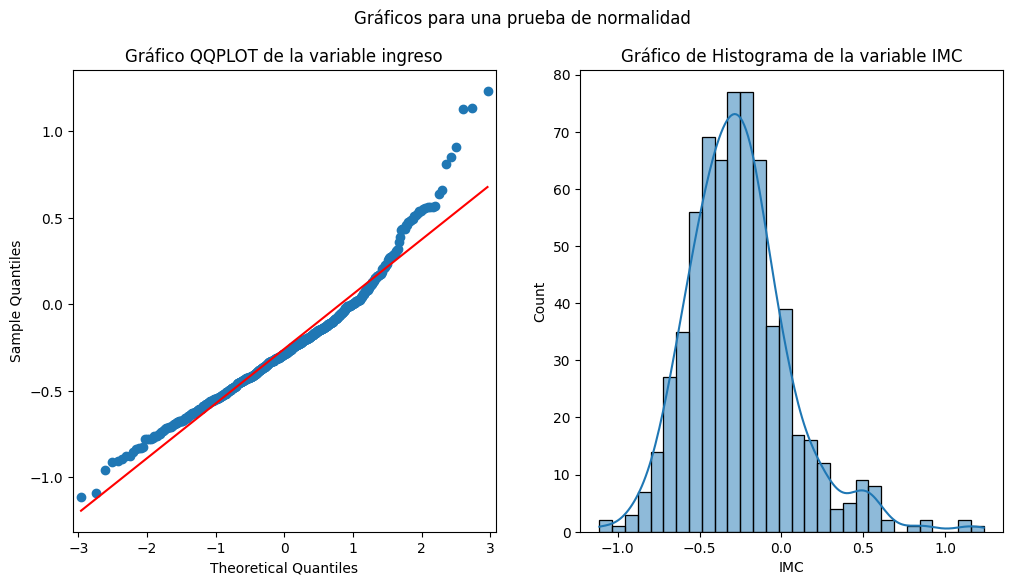

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable ingreso')
axes[1].set_title('Gráfico de Histograma de la variable IMC')

qqplot(data_riesgo_num2_estand['IMC'] , line='s', ax=axes[0])
sns.histplot(x='IMC', data=data_riesgo_num2_estand, ax=axes[1], kde= True)
plt.show()

In [ ]:
stat2, p2 = kstest(data_riesgo_num2_estand['IMC'] , 'norm')  #zingreso
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.356, p-value=0.000


##C. Normalización con SKLEARN
Estandariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

skler = StandardScaler()
data_riesgo_num2_skler = skler.fit_transform( data_riesgo_num2_norm )
data_riesgo_num2_skler

array([[-0.42702195,  1.18969571,  1.69050787, ...,  1.9958441 ,
         3.32175318,  3.2475333 ],
       [ 1.05046274,  1.18969571,  0.4810173 , ...,  0.58942383,
         0.11625847,  1.23048952],
       [-1.02896015,  1.18969571, -0.93005504, ...,  0.4136213 ,
         0.68193401,  0.39005461],
       ...,
       [-0.65958898,  0.23530432,  0.23200453, ..., -0.6411939 ,
        -0.07230004,  0.55814159],
       [ 2.11753502, -0.71908707,  3.76561424, ...,  0.06201623,
         0.68193401,  0.89431555],
       [-0.11237243, -0.71908707,  0.07785377, ...,  1.4684365 ,
         1.05905103,  1.56666348]])

In [ ]:
import numpy as np

np.var(data_riesgo_num2_skler[:, 1]).round(2) # revisamos una de las columnas

1.0

In [ ]:
data_riesgo_num2_skler = pd.DataFrame(
    data=data_riesgo_num2_skler,
    columns=var_numCol)
data_riesgo_num2_skler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

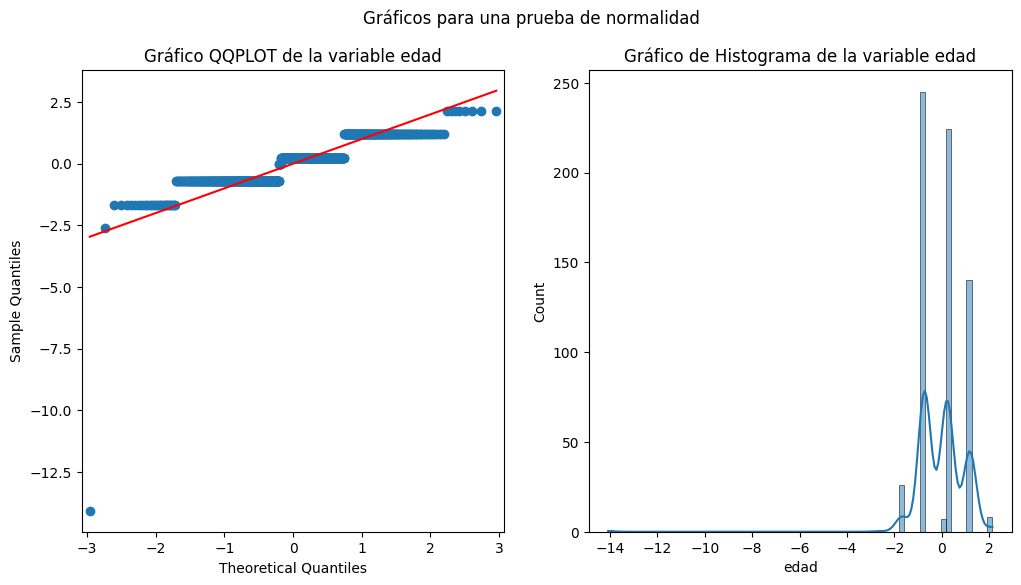

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable edad')
axes[1].set_title('Gráfico de Histograma de la variable edad')

qqplot(data_riesgo_num2_skler['edad'] , line='s', ax=axes[0])
sns.histplot(x='edad', data=data_riesgo_num2_skler, ax=axes[1], kde= True)
plt.show()

In [ ]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_num2_skler['edad'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))


Estadisticos=0.193, p-value=0.000


#Correlaciones

##Prueba de Correlacion: paramétrica " r pearson"

In [ ]:
##Prueba de Correlacion: paramétrica " r pearson"

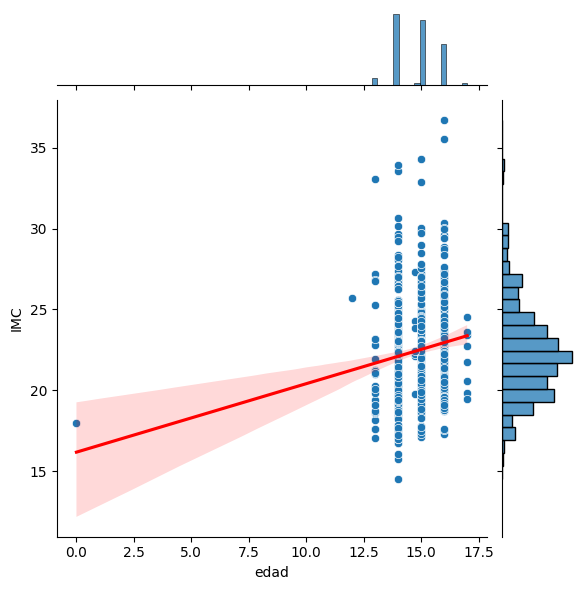

In [ ]:
# Graficamos las variables a correlacionar
# con línea de tendencia
g=sns.jointplot(x=df['edad'], y=df['IMC'])

sns.regplot(x='edad', y='IMC', data = df, ax=g.ax_joint, scatter=False, color= 'red');

In [ ]:
# Correlación r de pearson
from scipy.stats import pearsonr, spearmanr

r, p = pearsonr(df['edad'], df['IMC'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))

Correlación Pearson=0.147, p-value=0.000


Conclusión: Con un nivel de significancia del 5% se afirma que, no existe correlación entre aleatorioX y aleatorioY.

#Prueba de Correlacion: No parametrica

Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.

Nivel de significancia: 5%


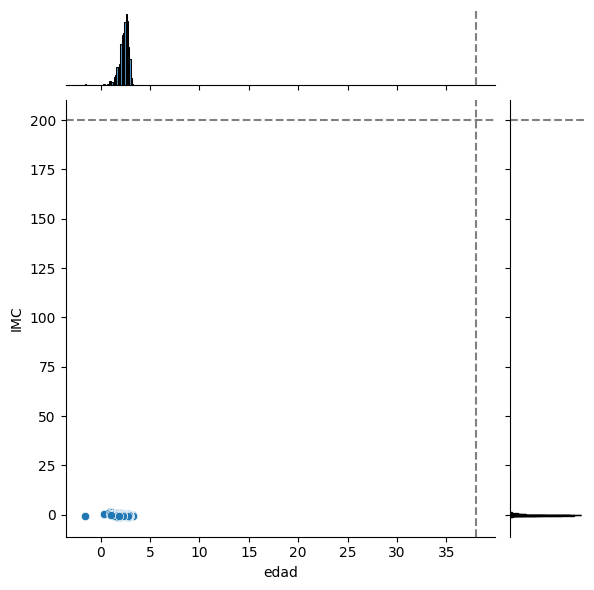

In [ ]:
g = sns.JointGrid(x="edad", y="IMC", data=data_riesgo_num2_estand, palette = "ch:s=.50,rot=-.35")
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=38, y=200)

In [ ]:
# Correlación spearmanr
from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(data_riesgo_num2_estand['edad'], data_riesgo_num2_estand['IMC'])

print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

Correlación Rho=-0.270, p-value=0.000


Conclusión: Con un nivel de significancia del 5% se afirma que, la edad y el IMC son mutuamente dependientes, con una correlación de rho = 0.270

#Chi - Cuadrado

2 variables son cualitativas (ordinales y/o nominales)

Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.

Nivel de significancia: 5%

In [ ]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        652 non-null    float64
 2   edad                         652 non-null    float64
 3   peso_kg                      652 non-null    float64
 4   circun_cuello                652 non-null    float64
 5   IMC                          652 non-null    float64
 6   circun_cintura               652 non-null    float64
 7   cadera                       652 non-null    float64
 8   ind_cintura_cadera           652 non-null    float64
 9   ind_cintura_estatura         652 non-null    float64
 10  por_grasa_corporal           652 non-null    float64
 11  masa_corporal_magra_kg       652 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [ ]:
#                                          VI                        VD
contingencia= pd.crosstab(df['Etapa-Vida'], df['IMC-Name'])
contingencia

IMC-Name,IMC Invalido,obesidad,peso insuficiente,peso normal,sobrepeso
Etapa-Vida,,,,,
,1,0,0,5,1
Adolescencia,18,12,37,486,91
Infancia,0,0,1,0,0


<Axes: xlabel='IMC-Name', ylabel='Etapa-Vida'>

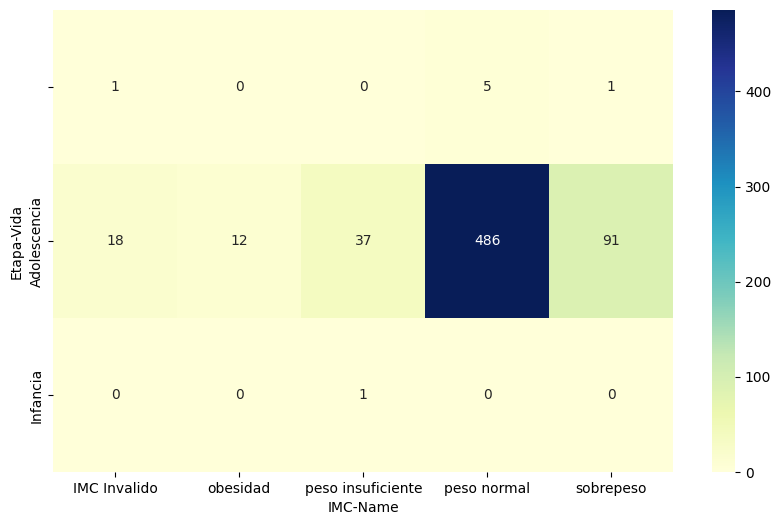

In [ ]:
# Mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(contingencia, annot=True, cmap="YlGnBu", fmt=".5g")

In [ ]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(contingencia)
# Print the p-value
print('p-value = %.3f'% p)

p-value = 0.011


#Prueba de Dos muestras Independientes - PARAMÉTRICO

Ho: Mu1 = Mu2; No existen diferencias entre las medias.

Ha: Mu1 <> Mu2; Existen diferencias entre las medias.

Nivel de significancia: 5%

"Prueba de T de Student"" Utilizamos cuando los 2 grupos o muestras, la variable de investigaci?n tienen distribuciones normales.


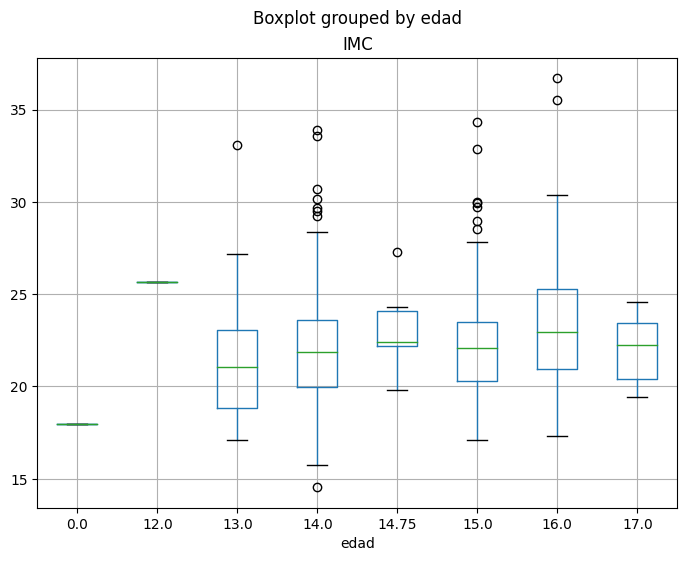

In [ ]:
# Graficamos

df.boxplot(column="IMC", by="edad",
	figsize=( 8,6 ))
plt.show()

nO HAY VARIABLES CATEGORICAS, DIGTONICAS.

#Prueba de ANOVA: "n" muestras independientes - PARAMÉTRICA

Ho: Mu1 = Mu2 = Mun; No existen diferencias entre las medias de los "n" grupos.

Ha: Mu1 <> Mun; Existen diferencias entre al menos dos medias.

"Prueba de ANOVA" Utilizamos cuando los "n" grupos o muestras, en la variable de investigación tienen distribuciones normales.


<bound method FacetGrid.set_axis_labels of <seaborn.axisgrid.FacetGrid object at 0x7b381c628700>>

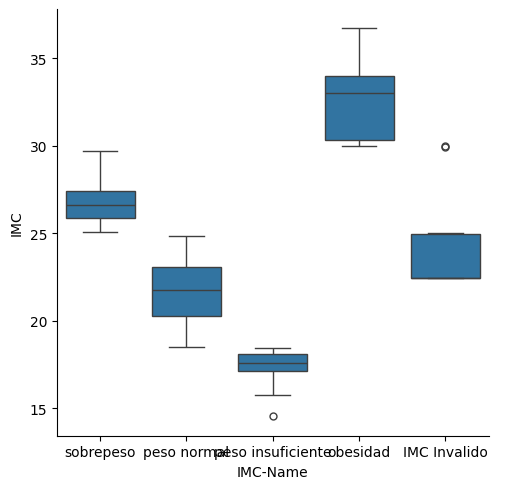

In [ ]:
# Graficamos
import seaborn as sns

g = sns.catplot(x = "IMC-Name", y = "IMC", data = df, kind = "box");
g.set_axis_labels
